In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from datetime import time
from datetime import timedelta
import pytz
import warnings
warnings.filterwarnings("ignore")

C:\Users\alisa\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def plot_sensor(sensor1_clean, nonfilter_color = 'r', filter_color = 'k', title = ''):
    test = sensor1_clean.dropna(subset=['delta'])
    test = test.dropna(subset=['avg_clean'])
    dates_array = test['dates'].to_numpy()
    delta_array = test['delta'].to_numpy()
    avg_array = test['avg_clean'].to_numpy()
    
    rows_with_nan_delta = df_sensor[df_sensor['delta'].isna()]
    
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(dates_array, delta_array, nonfilter_color + '.', linewidth=2)
    ax.plot(dates_array, avg_array, filter_color + '-', linewidth=1)
    vertical_lines = rows_with_nan_delta['dates']
    for i, line in enumerate(vertical_lines):
        plt.axvline(line, color='pink', linestyle='-', linewidth=4, alpha=0.5)
    plt.legend(['real points','moving average', 'harvest day'], loc='upper right')
    plt.xticks(rotation=90)
    plt.title(title, fontsize=16)
    plt.show()

In [3]:
folder_path = "sensor_and_harvest/sensor1/tank5/s1t5n_20231116.csv"
df_sensor = pd.read_csv(folder_path)
df_sensor['dates'] = pd.to_datetime(df_sensor['dates'], errors='coerce')

folder_path = "sensor_and_harvest/sensor1/tank5/s1t5n_u_20231116.csv"
df_sensor_u = pd.read_csv(folder_path)
df_sensor_u['dates'] = pd.to_datetime(df_sensor_u['dates'], errors='coerce')

folder_path = "sensor_and_harvest/sensor4/tank5/s4t5n_20231116.csv"
df_sensor4 = pd.read_csv(folder_path)
df_sensor4['dates'] = pd.to_datetime(df_sensor4['dates'], errors='coerce')

folder_path = "sensor_and_harvest/sensor4/tank5/s4t5n_u_20231116.csv"
df_sensor4_u = pd.read_csv(folder_path)
df_sensor4_u['dates'] = pd.to_datetime(df_sensor4_u['dates'], errors='coerce')

folder_path = "sensor_and_harvest/sensor5/tank5/s5t5n_20231116.csv"
df_sensor5 = pd.read_csv(folder_path)
df_sensor5['dates'] = pd.to_datetime(df_sensor5['dates'], errors='coerce')

folder_path = "sensor_and_harvest/sensor5/tank5/s5t5n_u_20231116.csv"
df_sensor5_u = pd.read_csv(folder_path)
df_sensor5_u['dates'] = pd.to_datetime(df_sensor5_u['dates'], errors='coerce')

In [4]:
df_sensor

,dates,on,off,g_val,times,avg,delta,int_dates,distance,avg_clean,Temp,Pressure,Humidity,Solar_radiation,harvest,tank,status_harvest
0,2023-11-16 10:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.11,NaN,restock
1,2023-11-16 22:01:18-05:00,33.0,0.0,1178.0,22:01:18,1044.777778,1178.0,1.066137e+09,109.228027,1044.777778,24.375000,1012.458333,78.500000,356.250000,NaN,5.0,NaN
2,2023-11-16 22:23:28-05:00,18.0,0.0,1177.0,22:23:28,1050.000000,1177.0,1.066137e+09,105.836670,1050.000000,24.375000,1012.458333,78.500000,356.250000,NaN,5.0,NaN
3,2023-11-16 22:45:31-05:00,19.0,0.0,835.0,22:45:31,1043.454545,835.0,1.066137e+09,238.551758,1043.454545,24.375000,1012.458333,78.500000,356.250000,NaN,5.0,NaN
4,2023-11-16 23:07:44-05:00,20.0,0.0,778.0,23:07:44,1042.750000,778.0,1.066137e+09,297.937012,1042.750000,24.250000,1011.575000,79.333333,157.250000,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,2024-01-11 02:50:24-05:00,35.0,0.0,1462.0,02:50:24,1347.750000,1462.0,1.066216e+09,89.062012,1347.750000,19.983333,1015.058333,61.416667,199.500000,NaN,5.0,NaN
701,2024-01-11 03:12:23-05:00,67.0,0.0,1330.0,03:12:23,1349.000000,1330.0,1.066217e+09,41.935547,1349.000000,18.250000,1015.741667,68.916667,28.416667,NaN,5.0,NaN
702,2024-01-11 03:34:22-05:00,50.0,0.0,1212.0,03:34:22,1345.600000,1212.0,1.066217e+09,158.925293,1345.600000,18.250000,1015.741667,68.916667,28.416667,NaN,5.0,NaN
703,2024-01-11 03:56:20-05:00,38.0,1.0,1513.0,03:56:20,1334.333333,1513.0,1.066217e+09,143.091797,1334.333333,18.250000,1015.741667,68.916667,28.416667,NaN,5.0,NaN


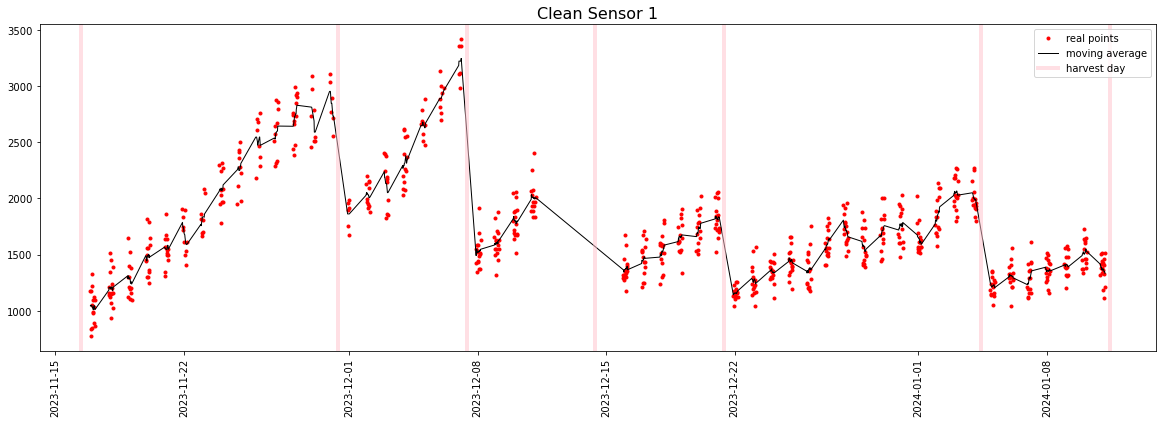

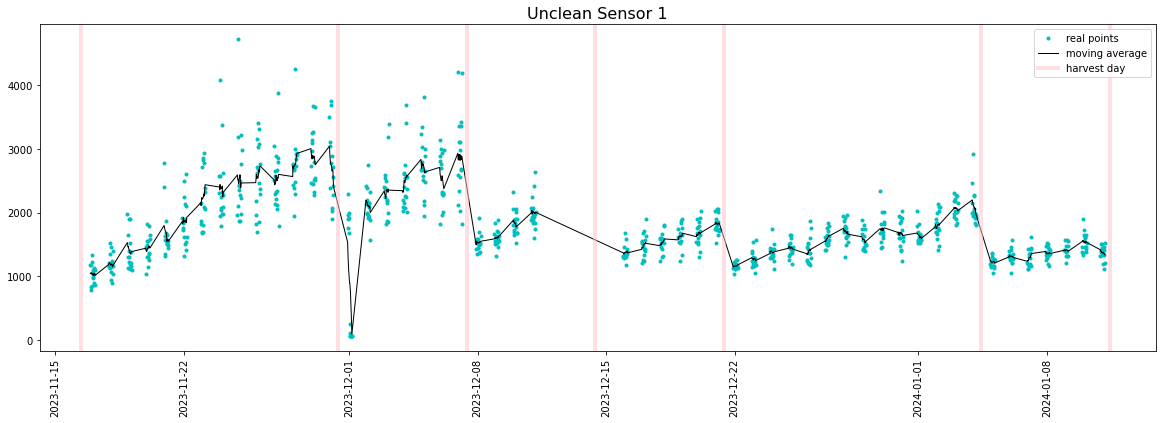

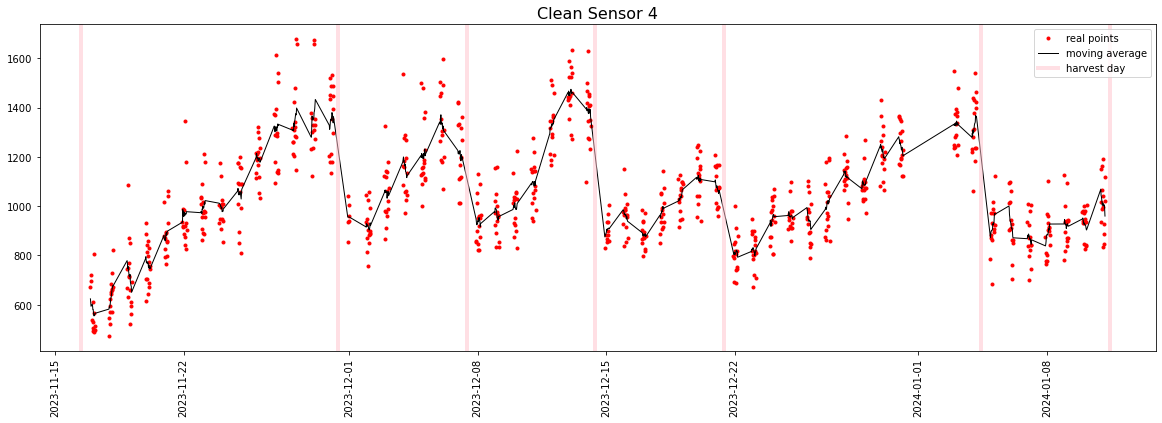

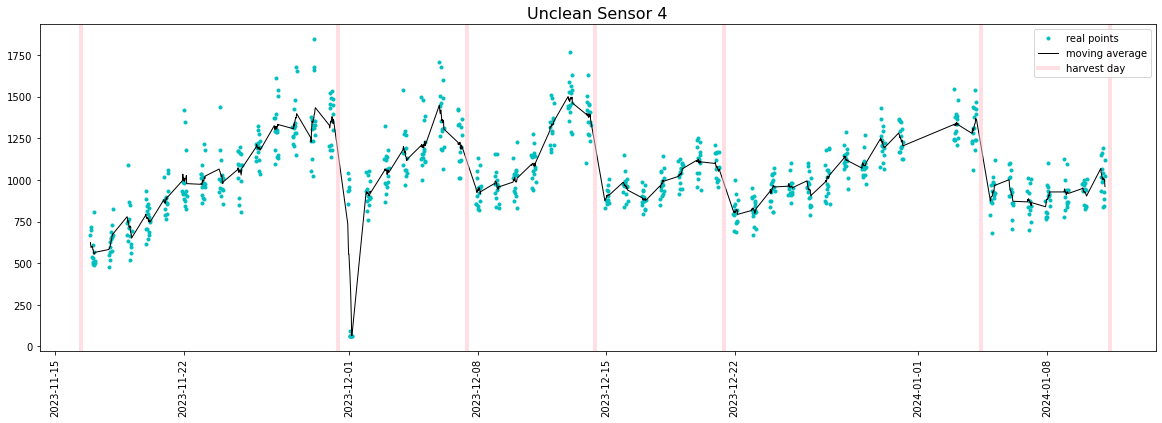

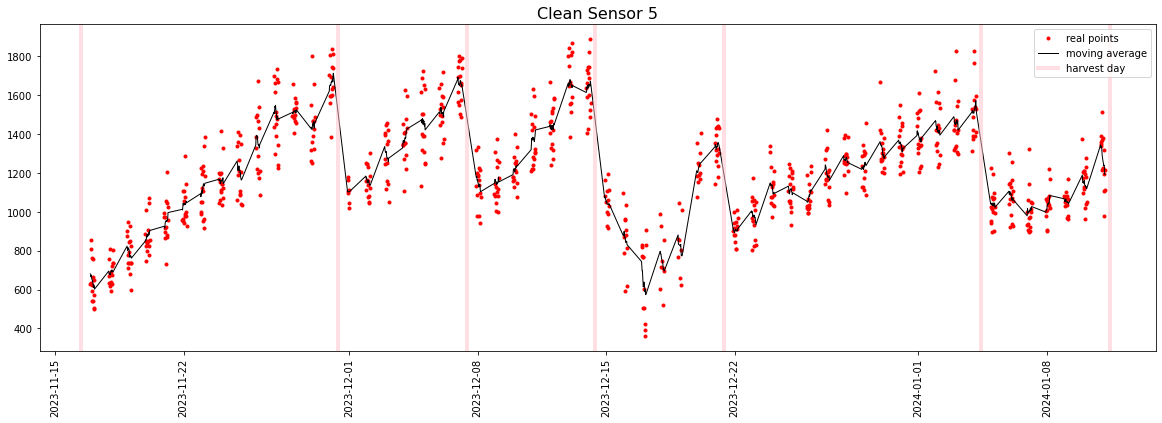

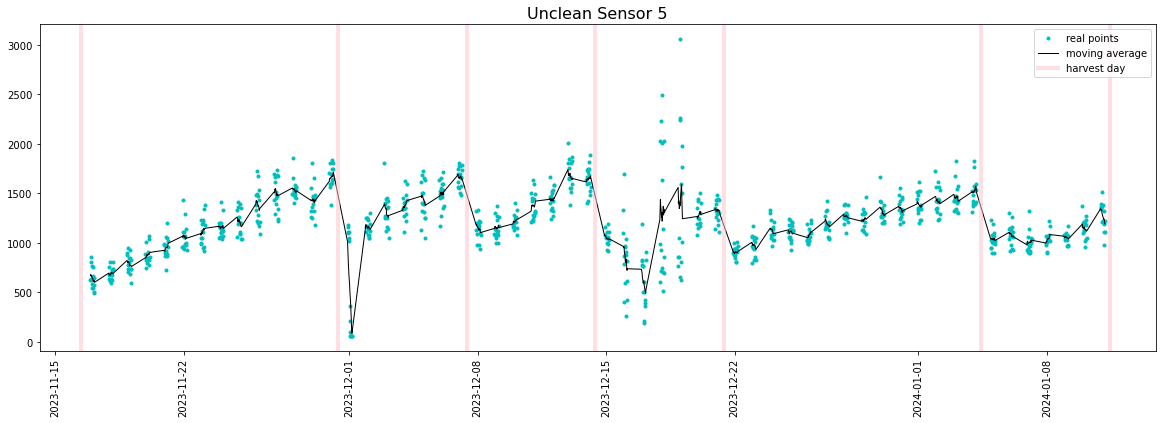

In [5]:
plot_sensor(df_sensor, title='Clean Sensor 1')
plot_sensor(df_sensor_u, title='Unclean Sensor 1', nonfilter_color = 'c')

plot_sensor(df_sensor4, title='Clean Sensor 4')
plot_sensor(df_sensor4_u, title='Unclean Sensor 4', nonfilter_color = 'c')

plot_sensor(df_sensor5, title='Clean Sensor 5')
plot_sensor(df_sensor5_u, title='Unclean Sensor 5', nonfilter_color = 'c')

In [6]:
def plot_sensor_temp(sensor1_clean, nonfilter_color = 'r', filter_color = 'k', title = ''):
    test = sensor1_clean.dropna(subset=['delta'])
    test = test.dropna(subset=['avg_clean'])
    dates_array = test['dates'].to_numpy()
    delta_array = test['delta'].to_numpy()
    avg_array = test['avg_clean'].to_numpy()
    temp_array = test['Temp'].to_numpy()
    
    rows_with_nan_delta = df_sensor[df_sensor['delta'].isna()]
    
    fig, ax = plt.subplots(figsize=(20, 6))
#     l1 = ax.plot(dates_array, delta_array, nonfilter_color + '.', linewidth=2, label='real points')
    l2 = ax.plot(dates_array, avg_array, filter_color + '-', linewidth=1, label='moving average')
    
    
    ax2 = ax.twinx()
    l3 = ax2.plot(dates_array, temp_array, 'b.', label='temperature')
    
    vertical_lines = rows_with_nan_delta['dates']
    for i, line in enumerate(vertical_lines):
        l4 = plt.axvline(line, color='pink', linestyle='-', linewidth=4, alpha=0.5, label = 'harvest day')
    
    
#     lines = [l1, l2, l3, l4]
#     plt.legend(lines, ['real points','moving average', 'temperature', 'harvest day'], loc='upper right')
    
    plt.xticks(rotation=90)
    plt.title(title, fontsize=16)
    plt.show()

# Show with temperature

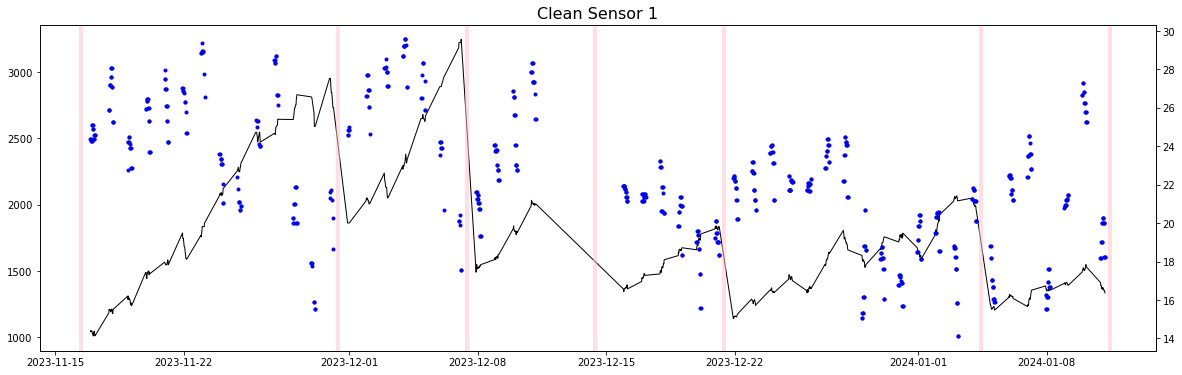

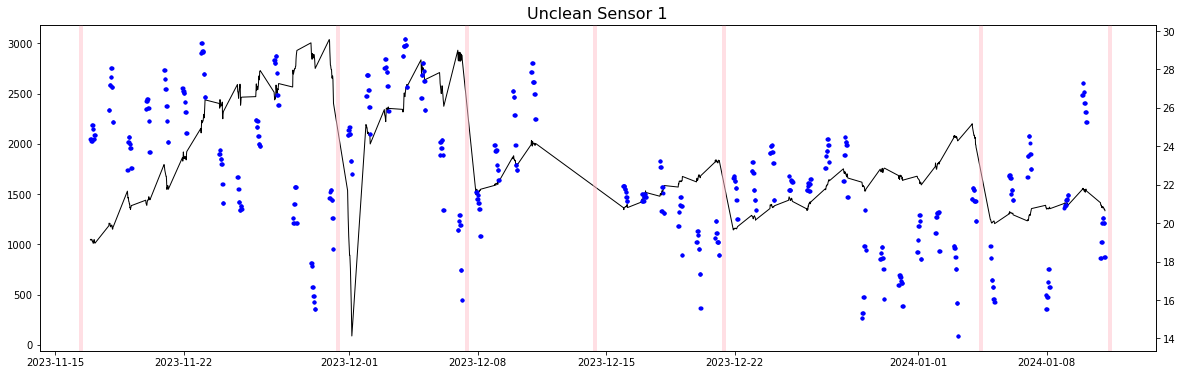

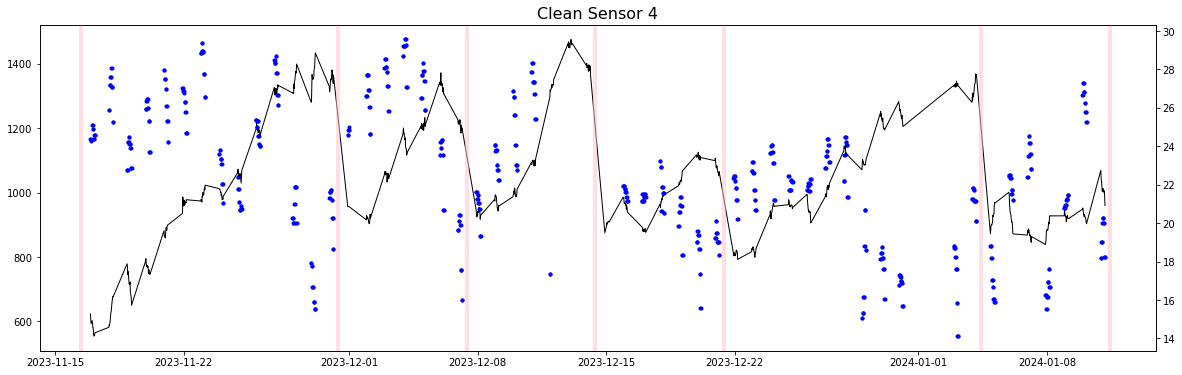

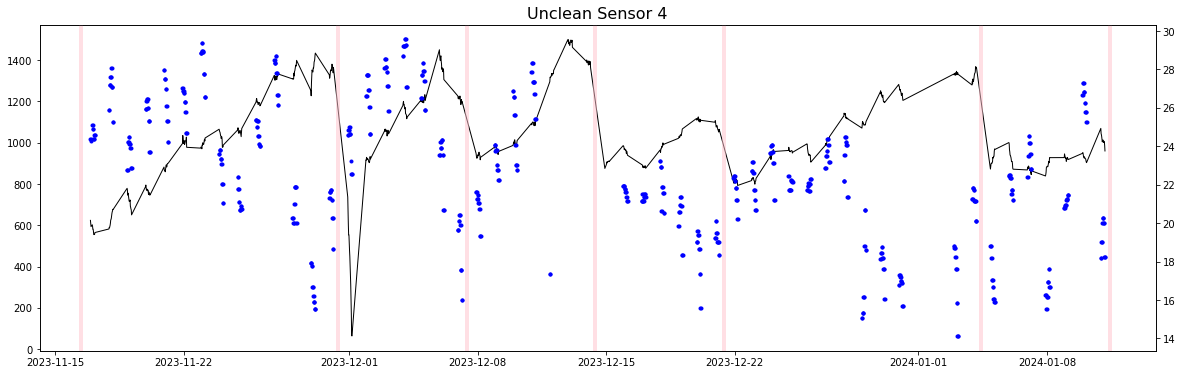

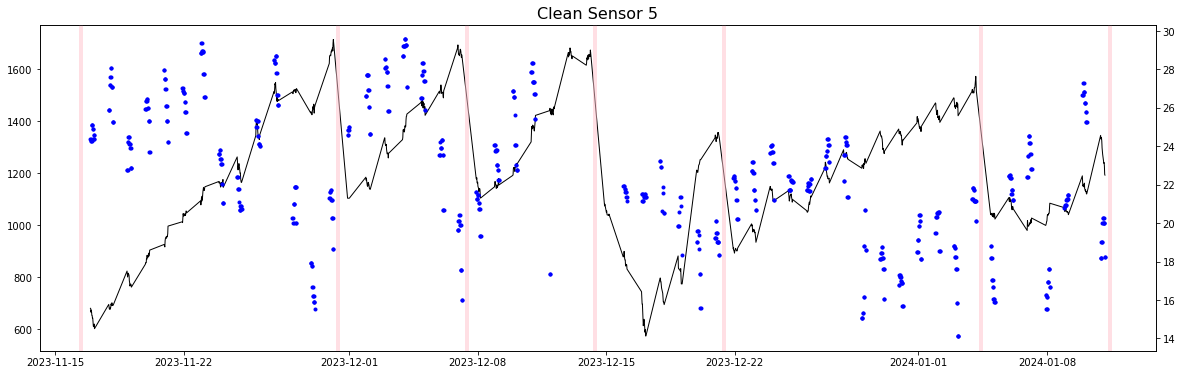

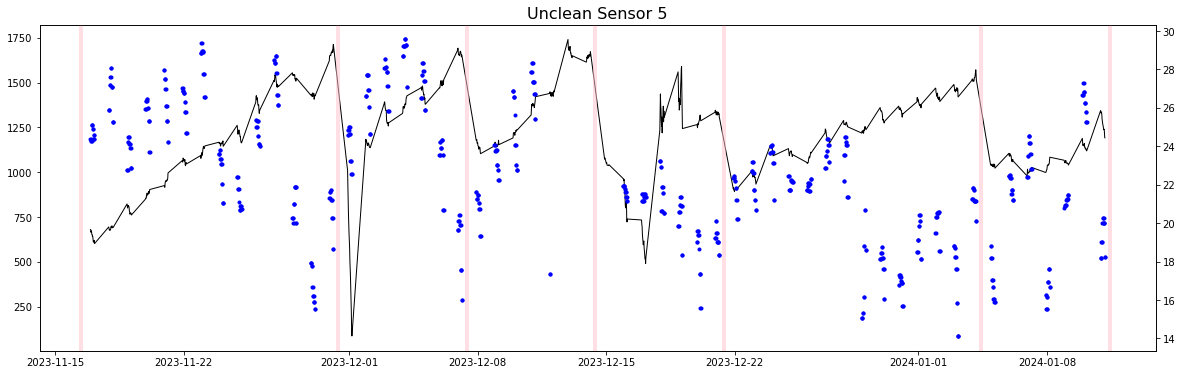

In [7]:
plot_sensor_temp(df_sensor, title='Clean Sensor 1')
plot_sensor_temp(df_sensor_u, title='Unclean Sensor 1', nonfilter_color = 'c')

plot_sensor_temp(df_sensor4, title='Clean Sensor 4')
plot_sensor_temp(df_sensor4_u, title='Unclean Sensor 4', nonfilter_color = 'c')

plot_sensor_temp(df_sensor5, title='Clean Sensor 5')
plot_sensor_temp(df_sensor5_u, title='Unclean Sensor 5', nonfilter_color = 'c')

In [8]:
df_harvest_fake = pd.read_csv("manual_harvest_data.csv")
df_harvest_fake = df_harvest_fake.rename(columns={"Date":"date", "Tank ID":"tank_id", "Before Harvest (kg)":"before", "After Harvest (kg)":"after", "Removed (kg)":"removed", "Comments":"comments"})
df_harvest_fake["datetime"] = pd.to_datetime(df_harvest_fake.date)
df_harvest_fake.head()

,date,tank_id,before,after,removed,comments,Unnamed: 6,Unnamed: 7,datetime
0,3.9.23,1,52.10,22.11,29.99,NaN,NaN,NaN,2023-03-09
1,3.9.23,2,0.00,0.00,0.00,Remained Empty,NaN,NaN,2023-03-09
2,3.9.23,3,51.81,0.00,51.81,Empty,NaN,NaN,2023-03-09
3,3.9.23,4,NaN,NaN,32.20,NaN,NaN,NaN,2023-03-09
4,3.9.23,5,NaN,NaN,22.70,NaN,NaN,NaN,2023-03-09


In [9]:
def get_algae_mass(df, start_date, end_date, tank):
    # only get data from specific tank
    sub_df = df[df.tank_id == tank].copy()
    # all days where the algae is reset
    restocks = np.array(sub_df[(sub_df.after > 0)].datetime, dtype='datetime64[s]')
    # all days where the algae is fully measured
    empties = np.array(sub_df[sub_df.before > 0].datetime, dtype='datetime64[s]')
    #generate an array for all recorded time
    days = (end_date - start_date).days
    date_range = [start_date + timedelta(hours=24*i) for i in range(days + 2)]
    algae_mass = np.zeros(len(date_range))

    #remove case where restock and empty are the same day
    if (restocks[-1] >= empties[-1]):
        restocks = restocks[:-1]

    rdx = len(restocks)

    # print(restocks, "\n", empties)

    for e in reversed(empties):
        rdx = rdx -1
        if rdx < 0:
            continue

        #get restock date for current empty date
        r = restocks[rdx]
        #get time between restock and empty date
        t = ( (e - r) / 60 / 60 / 24).astype('int') - 1
        #get starting mass
        start_mass = sub_df[sub_df.datetime == r].after.values[0]
        #get emptied mass
        end_mass = sub_df[sub_df.datetime == e].before.values[0]
        #get mass removed between restock and emptied dates
        removed_mass = sub_df[(sub_df.removed > 0) & (sub_df.datetime > r) & (sub_df.datetime < e)].removed.values.sum()
        #approximate mass growth per day
        mass_per_day = (end_mass + removed_mass - start_mass) / t

        start_idx = (r.astype(datetime) - start_date).days + 1
        end_idx = (e.astype(datetime) - start_date).days

        for i in range(start_idx, end_idx + 1):
            # print(date_range[i])
            #restock day
            if i == start_idx:
                algae_mass[i] = start_mass
            else:
                #add daily algae growth
                algae_mass[i] = algae_mass[i - 1] + mass_per_day
                #subtract algae if partial harvest day
                day_vals = sub_df[(date_range[i] - sub_df.datetime) == np.timedelta64(11, 'h')]
                removed = day_vals.removed.values
                if removed.any():
                    algae_mass[i] -= removed[0]

                # algae_mass[i] = round(algae_mass[i], 2)

    return algae_mass

# Calculate harvest data all

In [12]:
def get_havest(tank_no, df_harvest_fake):
    # Set date format for x-axis labels
    date_fmt = '%m-%d %H:%M'
    # Use DateFormatter to set the data to the correct format.
    date_formatter = mdates.DateFormatter(date_fmt, tz=(pytz.timezone("US/Eastern")))

    # start_date = datetime(dts.year, dts.month, dts.day, 11, 0)
    # end_date = datetime(dte.year, dte.month, dte.day, 11, 0)
    start_date = datetime(2023, 3, 9, 11, 0)
    end_date = datetime(2024, 1, 25, 11, 0)
    days = (end_date - start_date).days
    date_range = [start_date + timedelta(hours=24*i) for i in range(days + 2)]

    algae_mass = get_algae_mass(df_harvest_fake, start_date, end_date, tank_no)
    delta_mass = algae_mass[1:] - algae_mass[:-1]

    plt.figure()
    plt.plot(date_range, algae_mass, marker='.')
    # plt.plot(date_range[1:], delta_mass, marker='.')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(date_formatter)

    plt.ylabel("Algae Biomass (kg)")
    plt.title("Tank " + str(tank_no))
    plt.show()
    
    date_range = np.array(date_range)
    
    return date_range, algae_mass

## get and save

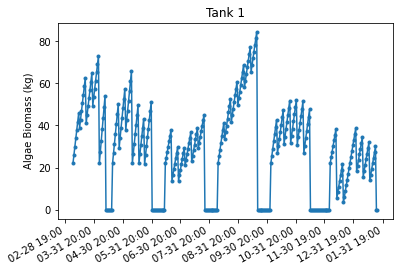

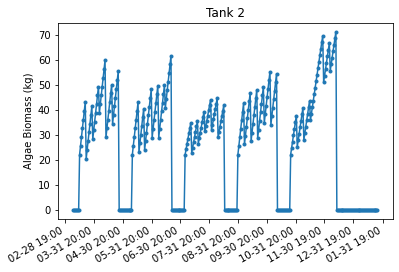

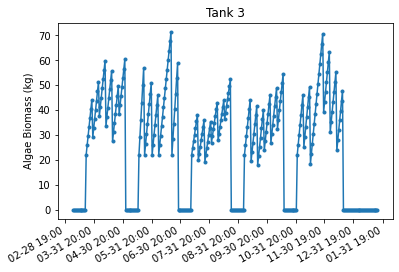

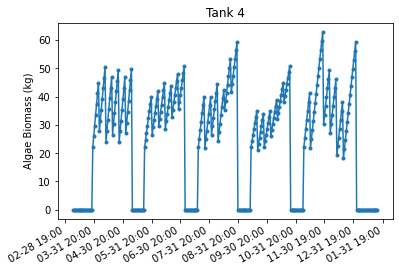

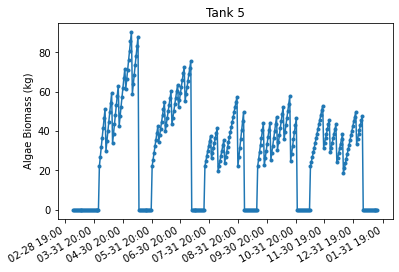

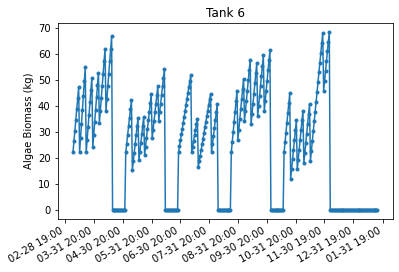

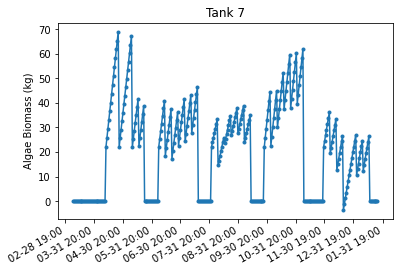

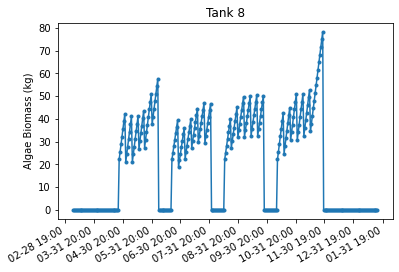

In [13]:
tanks = []
for i in range(8):
    date_range, algae_mass = get_havest(i + 1, df_harvest_fake)
    df1 = pd.DataFrame(date_range, columns=['dates'])
    df2 = pd.DataFrame(algae_mass, columns=['harvest'])
    merged_df = pd.concat([df1, df2], axis=1)
    merged_df.to_csv('harvest_tank' + str(i+1) + '.csv', index=False)
    tanks.append(merged_df)

In [16]:
def get_target_days(tank, df_sensor):
    dts = df_sensor['dates'].iloc[0]
    dte = df_sensor['dates'].iloc[-1]
    start_date = datetime(dts.year, dts.month, dts.day - 1, 11, 0)
    end_date = datetime(dte.year, dte.month, dte.day, 11, 0)
    tt = tank[tank['dates'] >= start_date]
    tt = tt[tt['dates'] <= end_date]
    
    dates_array = tt['dates'].to_numpy()
    algae_array = tt['harvest'].to_numpy()
    
    plt.figure()
    plt.plot(dates_array, algae_array, marker='.')
    plt.gcf().autofmt_xdate()

    plt.ylabel("Algae Biomass (kg)")
    plt.show()
    return tt

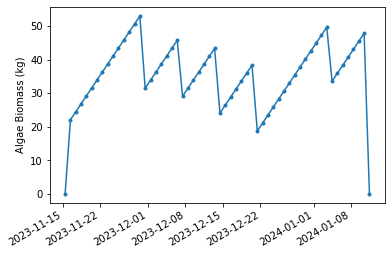

In [17]:
tank5 = get_target_days(tanks[4], df_sensor)

In [45]:
def plot_sensor_harvest(sensor1_clean, tank, nonfilter_color = 'r', filter_color = 'k', title = ''):
    test = sensor1_clean.dropna(subset=['delta'])
    test = test.dropna(subset=['avg_clean'])
    dates_array = test['dates'].to_numpy()
    delta_array = test['delta'].to_numpy()
    avg_array = test['avg_clean'].to_numpy()
    
    rows_with_nan_delta = df_sensor[df_sensor['delta'].isna()]
    
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(dates_array, delta_array, nonfilter_color + '.', linewidth=2)
    ax.plot(dates_array, avg_array, filter_color + '-', linewidth=1)
    vertical_lines = rows_with_nan_delta['dates']
    for i, line in enumerate(vertical_lines):
        ax.axvline(line, color='pink', linestyle='-', linewidth=4, alpha=0.5)
        
    d_array = tank['dates'].to_numpy()
    a_array = tank['harvest'].to_numpy()
    
    ax2 = ax.twinx()
    ax2.plot(d_array, a_array, 'b-.', label='algae', alpha=0.7)
    ax2.set_ylim(0, 70)
    
    ax.legend(['real points','moving average', 'harvest day'], loc='upper right')
#     ax.set_ylim(0, 2000)
    ax.set_ylim(0, None)
    plt.xticks(rotation=90)
    plt.title(title, fontsize=16)
    plt.show()

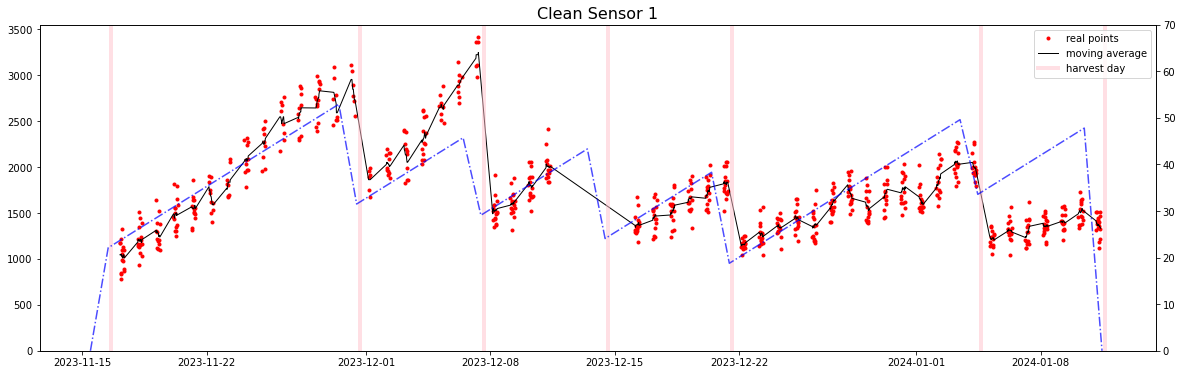

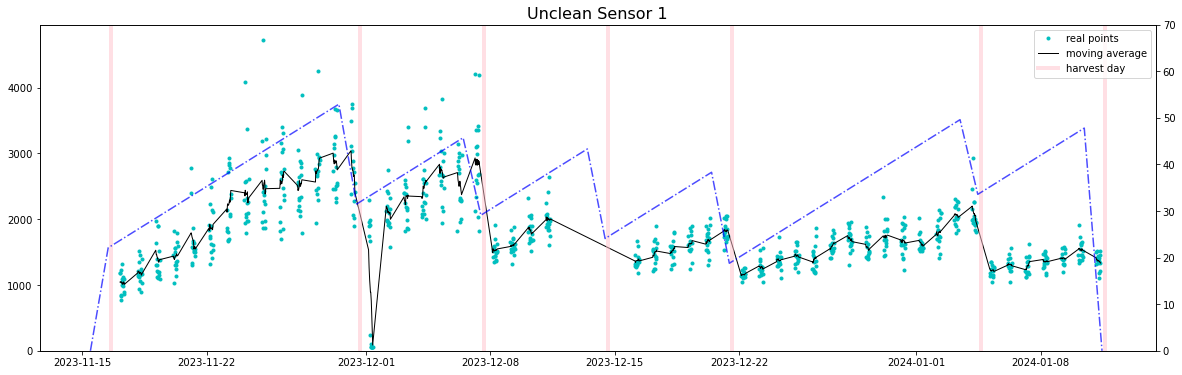

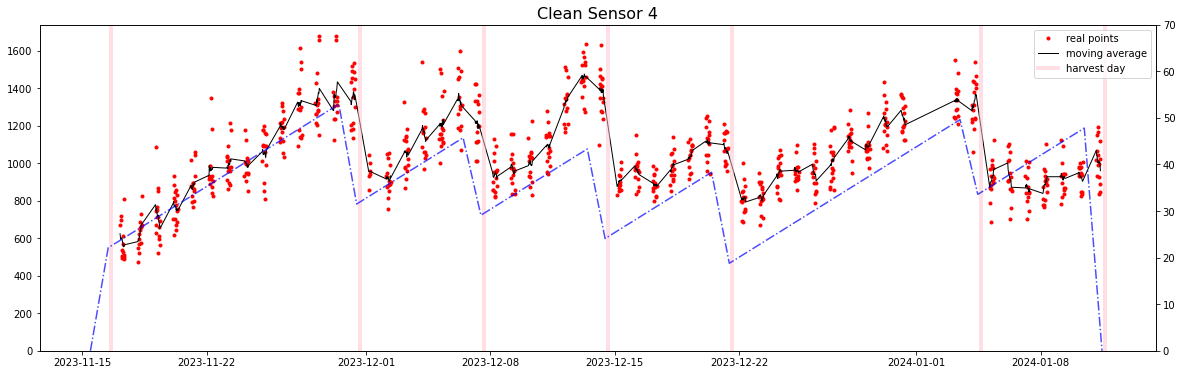

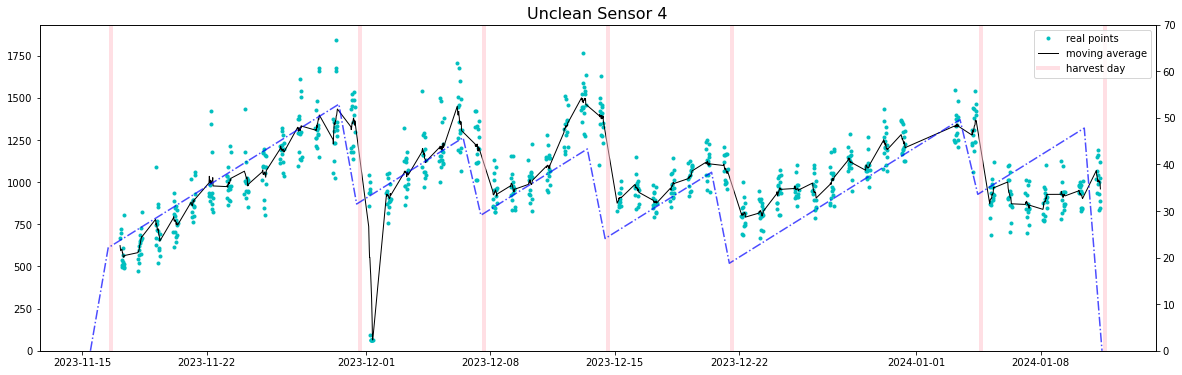

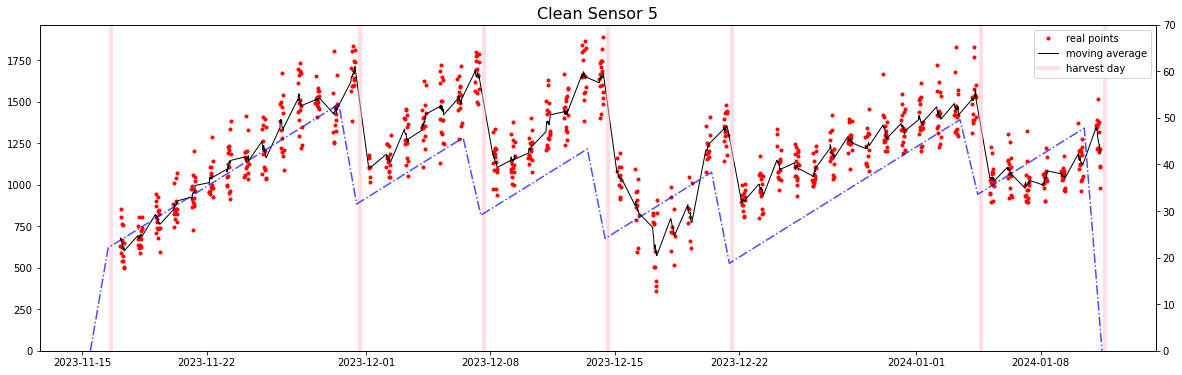

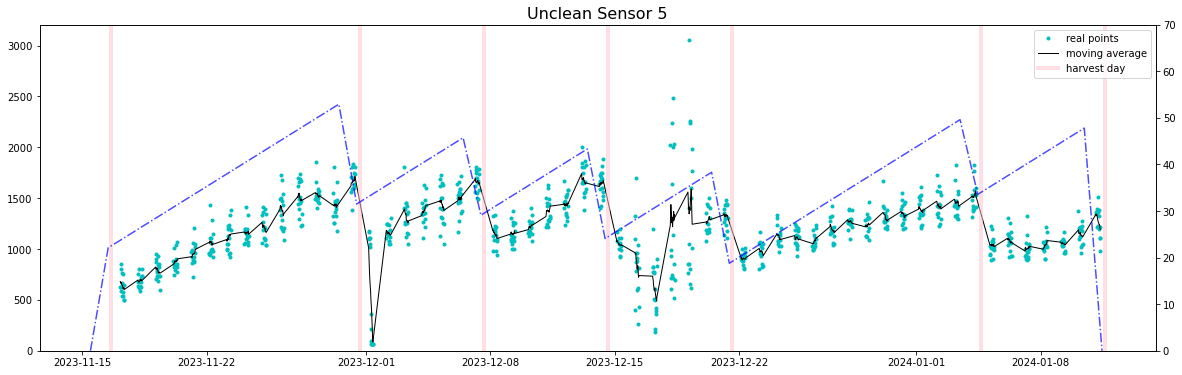

In [46]:
plot_sensor_harvest(df_sensor, tank5, title = 'Clean Sensor 1')
plot_sensor_harvest(df_sensor_u, tank5, title='Unclean Sensor 1', nonfilter_color = 'c')

plot_sensor_harvest(df_sensor4, tank5, title='Clean Sensor 4')
plot_sensor_harvest(df_sensor4_u, tank5, title='Unclean Sensor 4', nonfilter_color = 'c')

plot_sensor_harvest(df_sensor5, tank5, title='Clean Sensor 5')
plot_sensor_harvest(df_sensor5_u, tank5, title='Unclean Sensor 5', nonfilter_color = 'c')